In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as si
import scipy as sp

# Integral Transform
$$
g(\mathbf{x}) = \int\limits_{\Omega} K(\mathbf{x}, \xi) f(\xi) d\xi, \quad \mathbf{x}, \xi \in\Omega\subset\mathbb{R}^n \nonumber
$$

* $K(\mathbf{x}, \xi)$ - the Kernel;
* Mapping a function $f(\mathbf{x})$ in $\mathbf{x}$-space into another function $g(\xi)$ in $\xi$-space
* Fourier, Wavelet, Z-transform, Laplace, Hilbert, Radon, etc



## Fourier transform
### Discrete Fourier transform (DFT)
Given a sequence $\{x_0,...,x_{N-1}\}$ of $N$ complex numbers,
- The DFT transforms $\{x_0,...,x_{N-1}\}$ into $\{X_0,...,X_{N-1}\}$ i.e. $\mathcal{F}\{x \}=X$ such that :
$$X_k=\sum_{n=0}^{N-1}x_n\exp(-i2π\frac{k}{N}n) \; ∀k=0,...,N-1$$
- The inverse fourier transform,$x=\mathcal{F}^{-1}\{X\}$ , is given by :  
$$x_n=\frac{1}{N}\sum_{k=0}^{N-1}X_k\exp(i2π\frac{k}{N}n)$$
- We can represent it in form of a matrix, for $w$ : $N$th root of unity, i.e. $\displaystyle w=\exp(-i2π/N)$ :
$$\left(\begin{matrix} X_0\\X_1 \\ \vdots \\X_{N-2} \\X_{N-1} \end{matrix}\right)=\left(\begin{matrix} 1 & 1 & \cdots & 1 &1\\1 & w & \cdots & w^{N-2} &w^{N-1} \\ \vdots & \vdots & \vdots & \vdots &\vdots \\1 & w^{N-2} & \cdots & w^{(N-2)(N-2)} &w^{(N-2)(N-1)} \\1 & w^{N-1} & \cdots & w^{(N-1)(N-2)} &w^{(N-1)(N-1)}  \end{matrix}\right)
\left(\begin{matrix} x_0\\x_1 \\ \vdots \\x_{N-2} \\x_{N-1} \end{matrix}\right)$$

$$⇔ \left(\begin{matrix} x_0\\x_1 \\ \vdots \\x_{N-2} \\x_{N-1} \end{matrix}\right)=\frac{1}{N}
\left(\begin{matrix} 1 & 1 & \cdots & 1 &1\\1 & w^{-1} & \cdots & w^{-(N-2)} &w^{-(N-1)} \\ \vdots & \vdots & \vdots & \vdots &\vdots \\1 & w^{-(N-2)} & \cdots & w^{-(N-2)(N-2)} &w^{-(N-2)(N-1)} \\1 & w^{-(N-1)} & \cdots & w^{-(N-1)(N-2)} &w^{-(N-1)(N-1)}  \end{matrix}\right) \left(\begin{matrix} X_0\\X_1 \\ \vdots \\X_{N-2} \\X_{N-1} \end{matrix}\right)
$$


- The DFT of a multidimensional array $\displaystyle x_{n_1,...,n_d}$, where $n_l=0,...,N_l-1 \; ∀l=1,...,d$ is given by :
$$X_{k_1,...,k_d}=\sum_{n_1=0}^{N_1-1}\left(w_{N_1}^{k_1n_1}\sum_{n_2=0}^{N_2-1}\left(w_{N_2}^{k_2n_2} \cdots \sum_{N_d=0}^{N_d-1}w_{N_d}^{k_dn_d}x_{n_1,...,n_d}\right) \right)$$
Where $w_{N_l}=\exp(-i2π/N_l)$. We can rewrite the above in term of vector $k=(k_1,...,k_d),n=(n_1,..,n_d),N=(N_1,...,N_d)$:
$$X_k=\sum_{n=0}^{N-1}x_n\exp(-i2πk\cdot \frac{n}{N})$$
Its inverse transform is given by :
$$x_n=\frac{1}{\prod_{l=1}^dN_l}\sum_{k=0}^{N-1}X_k\exp(i2πk\cdot \frac{n}{N})$$
- Fast algorithm on computing the DFT (Fast Fourier Transform) : Cooley-Tukey algorithm.  

$$X_k=\sum_{n=0}^{N-1}x_n\exp(-i2π\frac{k}{N}n) \; ∀k=0,...,N-1$$
$$=\sum_{n=0}^{N/2-1}x_{2n}\exp(-i2π\frac{k}{N/2}(n))+\exp(-2iπ\frac{k}{N})\sum_{n=0}^{N/2-1}x_{2n+1}\exp(-i2π\frac{k}{N/2}(n))$$
1. **Base Case**: If the length of the input array $ x $ is 1 or less, return the array itself.
2. **Recursive Split**: Split the input array into even-indexed and odd-indexed elements.
3. **Recursive FFT**: Recursively compute the FFT of the even and odd elements.
4. **Combine Results**: Combine the results using the twiddle factors $ T $, which are the complex exponentials.
5. **Return**: Return the combined results.
For $N=2^R$ the reduction can be applied multiple times until we subdivide the data into the R transforms of length 1.

- For the 2D version of DFT :
$$X_{k_1,k_2}=\sum_{n_1=0}^{N_1-1}\left(w_{N_1}^{k_1n_1}\sum_{n_2=0}^{N_2-1}\left(w_{N_2}^{k_2n_2}x_{n_1,n_2} \right) \right)$$
$$=\sum_{n_1=0}^{N_1/2-1}\sum_{n_2=0}^{N_2/2-1}\exp\left(-2iπ\left(\frac{n_1k_1}{N_1/2}+\frac{n_2k_2}{N_2/2} \right)\right)x_{2n_1,2n_2}
+\exp(-2iπ\frac{k_1}{N_1})\sum_{n_1=0}^{N_1/2-1}\sum_{n_2=0}^{N_2/2-1}\exp\left(-2iπ\left(\frac{n_1k_1}{N_1/2}+\frac{n_2k_2}{N_2/2} \right)\right)x_{2n_1+1,2n_2}
+\exp(-2iπ\frac{k_2}{N_2})\sum_{n_1=0}^{N_1/2-1}\sum_{n_2=0}^{N_2/2-1}\exp\left(-2iπ\left(\frac{n_1k_1}{N_1/2}+\frac{n_2k_2}{N_2/2} \right)\right)x_{2n_1,2n_2+1}
+\exp(-2iπ(k_1/N_1+k_2/N_2))\sum_{n_1=0}^{N_1/2-1}\sum_{n_2=0}^{N_2/2-1}\exp\left(-2iπ\left(\frac{n_1k_1}{N_1/2}+\frac{n_2k_2}{N_2/2} \right)\right)x_{2n_1+1,2n_2+1}$$


In [ ]:
#this perform a fourier transform of an 1D array :
def DFT_matrix(n):
  x,y=np.mgrid[0:n:1,0:n:1]
  return np.exp(-2*np.pi*1j*x*y/n)

#cooley-Tukey FFT algorithm

def DFT_1D(array):#DFT of (x_0, x_1, x_{2}, ..., x_{N-1})
  N=len(array)
  if N<=1:
    return array

  elif N&(N-1) == 0: #check if it is power of 2
    X=np.zeros_like(array,dtype=complex)
    even=DFT_1D(array[0::2])
    odd=DFT_1D(array[1::2])
    for k in range(N//2):
      p=even[k]
      q=np.exp(-2j*np.pi*k/N)*odd[k]
      X[k]=complex(p+q)
      X[k+N//2]=complex(p-q)
    return X
  else:
    return DFT_matrix(N)@array

def DFT_2D(f):
    M, N = f.shape
    if M <= 1 and N <= 1:
        return f
    elif (N&(N-1) == 0) and (M&(M-1)==0): #check if it is power of 2
      # Split the input into four parts
      f_ee = f[::2, ::2]  # Even-Even
      f_eo = f[::2, 1::2]  # Even-Odd
      f_oe = f[1::2, ::2]  # Odd-Even
      f_oo = f[1::2, 1::2]  # Odd-Odd

      # Recursively compute the FFT of each part
      F_ee = DFT_2D(f_ee)
      F_eo = DFT_2D(f_eo)
      F_oe = DFT_2D(f_oe)
      F_oo = DFT_2D(f_oo)

      # Combine the results
      M2, N2 = M // 2, N // 2
      F = np.zeros((M, N), dtype=complex)

      for k in range(M2):
          for l in range(N2):
              T_eo = F_eo[k, l] * np.exp(-2j * np.pi * l / N)
              T_oe = F_oe[k, l] * np.exp(-2j * np.pi * k / M)
              T_oo = F_oo[k, l] * np.exp(-2j * np.pi * (k / M + l / N))

              F[k, l] = F_ee[k, l] + T_eo + T_oe + T_oo
              F[k, l + N2] = F_ee[k, l] - T_eo + T_oe - T_oo
              F[k + M2, l] = F_ee[k, l] + T_eo - T_oe - T_oo
              F[k + M2, l + N2] = F_ee[k, l] - T_eo - T_oe + T_oo

      return F
    else:
      F = np.zeros((M, N), dtype=complex)
      for u in range(M):
          for v in range(N):
              a=np.array([[f[m, n]*np.exp(-2j*np.pi*(u*m/M+v*n/N)) for m in range(M)] for n in range(N)])


              F[u, v] = np.sum(a)
      return F



### Fourier transform for continuous data
- A fourier transform a complex-valued function  $f(x)$ into its constituent frequencies and their amplitudes. The inverse process is synthesis, which recreates $f(x)$ from its transform.
$$\mathcal{F}[f](ω)=\widehat{f}(w)=\int_{\mathbb{R}}f(x)\exp(-iwx)dx$$
$$⇔\mathcal{F^{-1}}[\widehat{f}](x)=f(x)=\frac{1}{2\pi}\int_{\mathbb{R}}f(x)\exp(iw x)dw$$
- Example:
1. $f(x)=1$
$$\widehat{f}(w)=\int_{\mathbb{R}}\exp(-iwx)dx=δ(w)$$
$$⇔\mathcal{F^{-1}}[\widehat{f}](x)=\frac{1}{2\pi}\int_{\mathbb{R}}δ(x)\exp(iw x)=1$$
2. $f(x)=\exp(iax)$
$$\widehat{f}(w)=\int_{\mathbb{R}}\exp(iax)\exp(-iwx)dx=δ(w-a)$$
$$\mathcal{F^{-1}}[\widehat{f}](x)=\frac{1}{2\pi}\int_{\mathbb{R}}δ(w-a)\exp(iw x)dw=\exp(iax)$$
3. $f(x)=\cos(ax)$
$$\widehat{f}(w)=\int_{\mathbb{R}}\cos(ax)\exp(-iwx)dx=\frac{1}{2}\left(δ(w-a)+δ(w+a)\right)$$
$$\mathcal{F^{-1}}[\widehat{f}](x)=\frac{1}{2\pi}\int_{\mathbb{R}}\frac{1}{2}\left(δ(w-a)+δ(w+a)\right)\exp(iw x)=cos(ax)$$

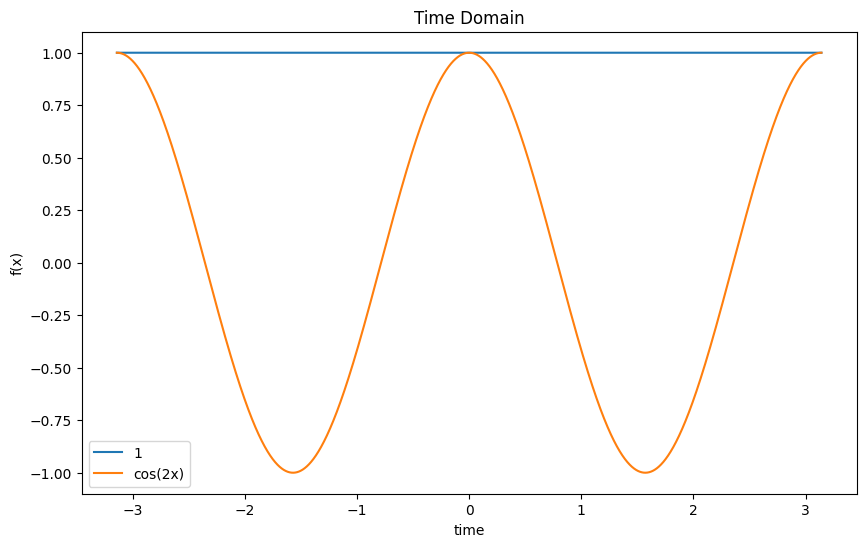

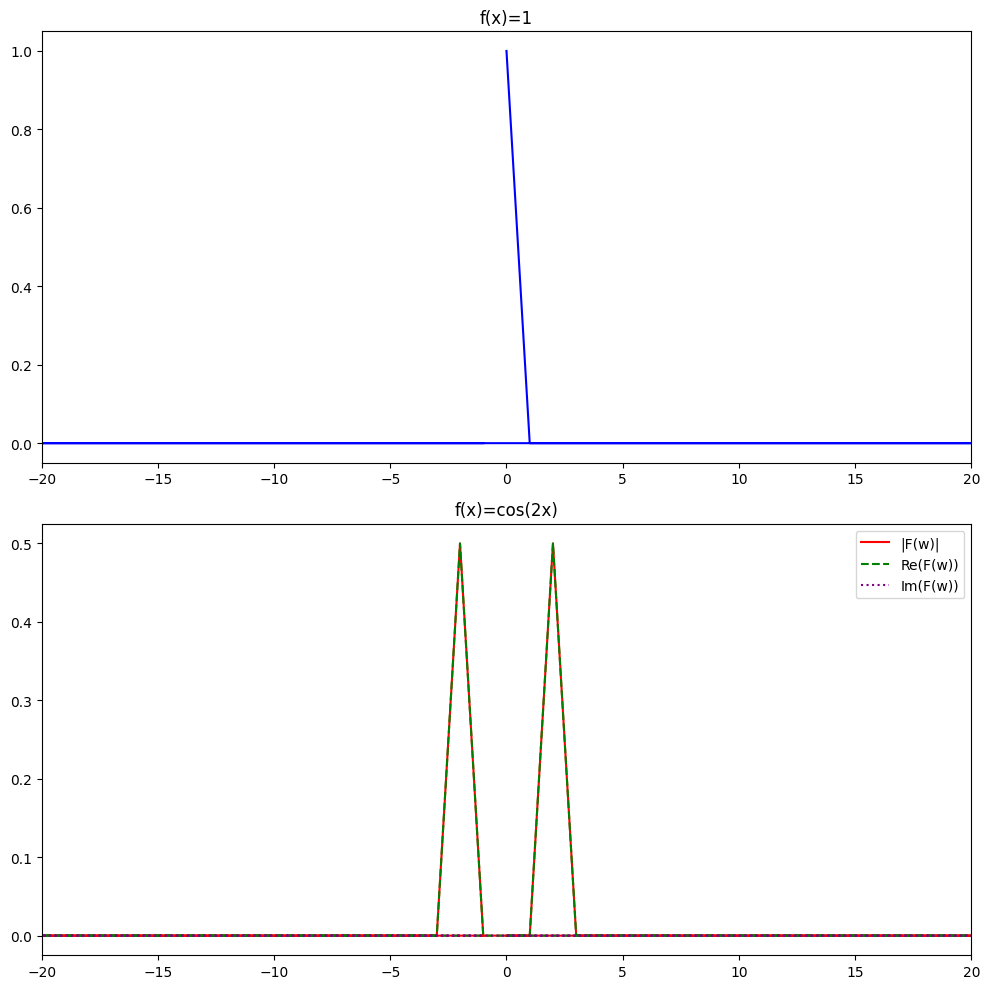

In [ ]:

N = 10**5
x = np.linspace(-np.pi, np.pi, N)
a = 2

f1 = np.ones_like(x)
f2 = np.cos(a * x)

plt.figure(figsize=(10, 6))
plt.plot(x, f1, label="1")
plt.plot(x, f2, label=f"cos({a}x)")
plt.xlabel("time")
plt.ylabel("f(x)")
plt.title("Time Domain")
plt.legend()
plt.show()

# Its Fourier transform
dx = x[1] - x[0]
freq = np.fft.fftfreq(N, dx) * 2 * np.pi

F1_w = np.fft.fft(f1)
F2_w = np.fft.fft(f2)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Normalize the FFT results
F1_w /= N
F2_w /= N

# Calculate magnitude, real, and imaginary parts of F2_w
F2_w1 = np.abs(F2_w)
F2_w2 = np.real(F2_w)
F2_w3 = np.imag(F2_w)

ax0.set_xlim(-10 * a, 10 * a)
ax1.set_xlim(-10 * a, 10 * a)

ax0.set_title('f(x)=1')
ax1.set_title(f'f(x)=cos({a}x)')

# Plot the magnitude of F1_w
ax0.plot(freq, np.abs(F1_w), label='|F(w)|', color='blue')

# Plot the magnitude, real, and imaginary parts of F2_w
ax1.plot(freq, F2_w1, label=f'|F(w)|', color='red')
ax1.plot(freq, F2_w2, label=f'Re(F(w))', linestyle='--', color='green')
ax1.plot(freq, F2_w3, label=f'Im(F(w))', linestyle=':', color='purple')

plt.legend()
plt.tight_layout()
plt.show()

### Short Time Fourier transform (STFT)
- To determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time (divide longer intervals into shorter).
$$STFT\{x(t)\}(τ,w)=X(τ,w)=∫_{-∞}^∞x(t)W(t-\tau)\exp(-iw t)dt=\mathcal{F}[x(t)W(t-τ)]$$
where $W(t)$ is the window function (Hann window or Gaussian Window), $x(t)$ is the signal to be tranformed.
- Window function (Hann window: $W^H$ and Gaussian window: $W^G$):
$$ \begin{cases} W^H(n)=0.5(1-\cos(2π\frac{n}{N}))\; , 0\leq n\leq N \\W^H_0(n)=0.5(1-\cos((2π\frac{n}{N}))\; , -N/2\leq n\leq N/2\end{cases}$$
$$\begin{cases} W^G(n)=\exp\left(-\frac{1}{2}\left( \frac{n-N/2}{σN/2}\right)^2 \right)\; 0\leq n\leq N, σ\leq 0.5 \\
W^G(n)=\exp\left(-\frac{1}{2}\left( \frac{n}{σN/2}\right)^2 \right)\; -N/2\leq n\leq N/2,
\end{cases}$$
The following example take the signal $x(t)$ with frequency $f_1$,$f_2$:
$$x(t) = \sum_{f=1}^{10}\cos(2\pi (100t)) $$

<ipython-input-8-9022f1d2cdbf>:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  x =np.sum(np.cos(2 * np.pi * f* t) for f in freq)


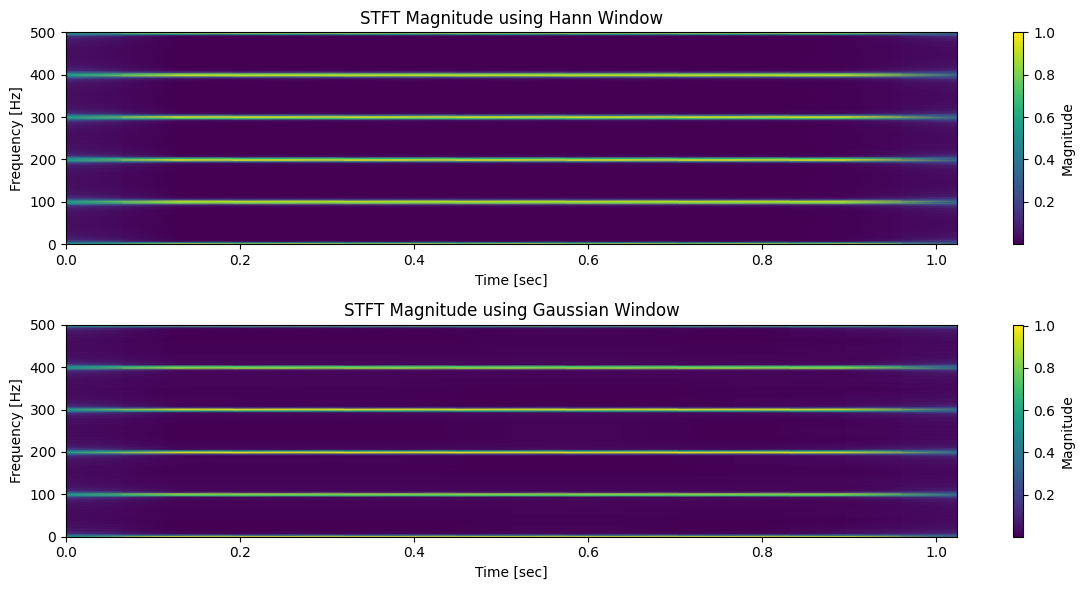

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Generate a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
freq=np.linspace(100,1000,10)  # Frequencies of the signal components
x =np.sum(np.cos(2 * np.pi * f* t) for f in freq)

# Parameters for STFT
nperseg = 256  # Number of samples per segment
noverlap = nperseg // 2  # Number of overlapping samples

# Hann window function
hann_window = signal.windows.hann(nperseg)

# Gaussian window function
sigma = 0.5
gaussian_window = signal.windows.gaussian(nperseg, sigma * nperseg / 2)

# Compute STFT using Hann window
f_hann, t_hann, Zxx_hann = signal.stft(x, fs, window=hann_window, nperseg=nperseg, noverlap=noverlap)

# Compute STFT using Gaussian window
f_gauss, t_gauss, Zxx_gauss = signal.stft(x, fs, window=gaussian_window, nperseg=nperseg, noverlap=noverlap)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.pcolormesh(t_hann, f_hann, np.abs(Zxx_hann), shading='gouraud')
plt.title('STFT Magnitude using Hann Window')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')

plt.subplot(2, 1, 2)
plt.pcolormesh(t_gauss, f_gauss, np.abs(Zxx_gauss), shading='gouraud')
plt.title('STFT Magnitude using Gaussian Window')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')

plt.tight_layout()
plt.show()



### Convolution
Let $k,f:\mathbb{R}^n\rightarrow \mathbb{R}^n$ be functions. A function $g$ is called convolution of $k$ and f if $$g=k*f ⇔g(x)=\int_{\mathbb{R}^n}k(x-t)f(t)dt $$
$k$ is called kernel or point spread function and being defined by hardware.

It known that fourier transform of convolution is product of fourier transform. i.e.
$$\mathcal{F}[f*g]=\mathcal{F}[f]\mathcal{F}[g] ⇔ \mathcal{F^{-1}}[\hat{f}\hat{g}]=f*g$$

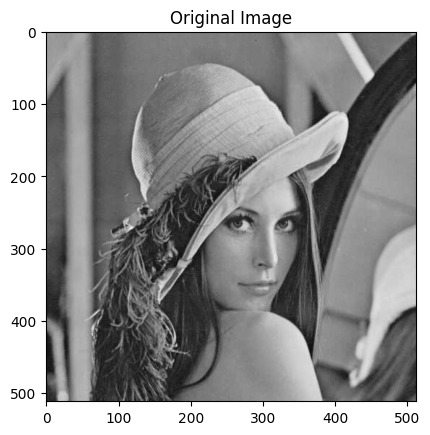

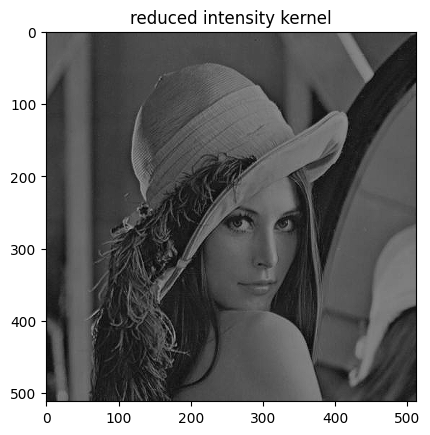

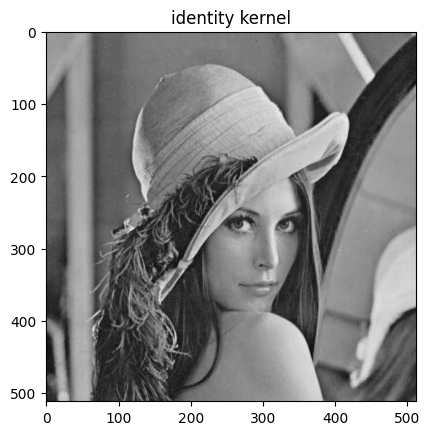

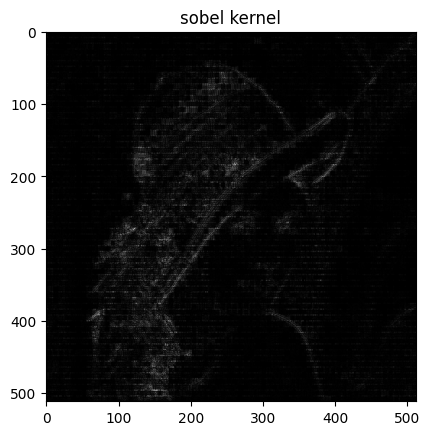

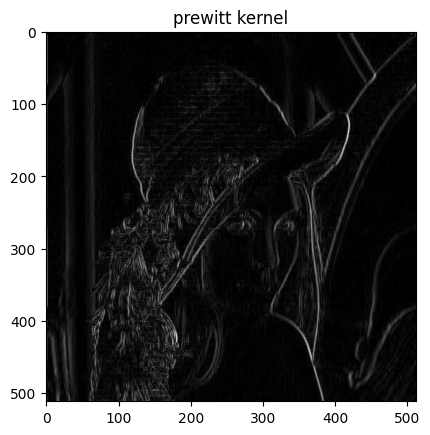

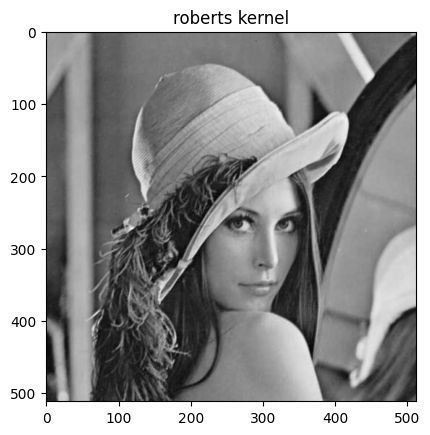

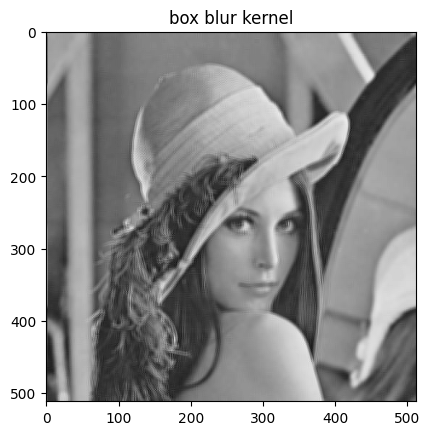

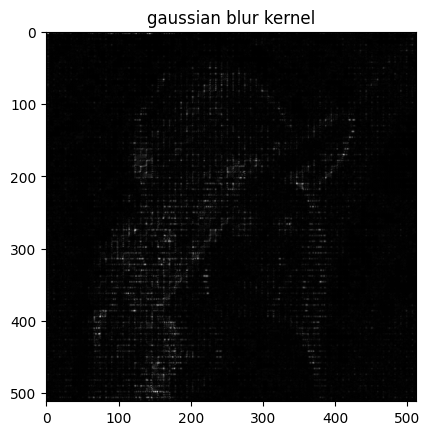

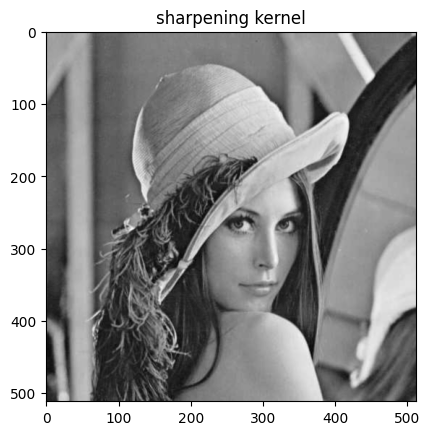

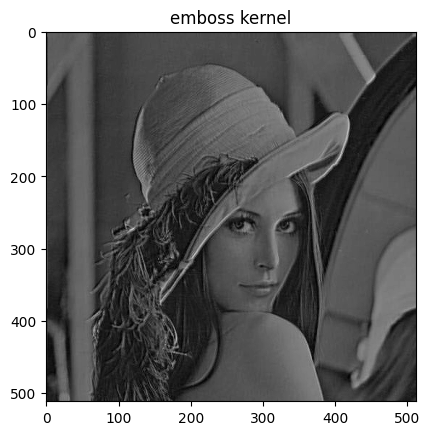

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from urllib.request import urlretrieve
from scipy.ndimage import convolve

# Function to perform convolution using FFT, image is the another to perform convolution with the kernel
# shape(image) = shape(kernel)
def gaussian_blur_kernel(sigma=1.0):
    # Blurs the image while reducing noise and preserving edges better than box blur
    size = int(2 * np.ceil(3 * sigma) + 1)
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()

def sobel_kernel(Type):  # Type = "H" or "V"
    # Detects edges in the horizontal and vertical directions.
    if Type == "H":
        return np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    elif Type == "V":
        return np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

def prewitt_kernel(Type):
    # Similar to Sobel but less sensitive to noise.
    if Type == "H":
        return np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    elif Type == "V":
        return np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

def roberts_kernel():
    # Detects edges at 45-degree angles.
    return np.array([[0, -1], [-1, 0]])

def box_blur_kernel():
    # Simple averaging filter to blur the image.
    return np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

def sharpening_kernel():
    # Enhances the edges and details in the image.
    return np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

def emboss_kernel():
    # Creates an embossed effect, making the image look like it is lit from a specific direction
    return np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

def convolution(kernel, image):  # convolution with some kernel
    # FT of convolution = FT of product
    FT_kernel = np.fft.fft2(kernel, s=image.shape)
    FT_kernel = np.fft.fftshift(FT_kernel)
    FT_image = np.fft.fft2(image)
    FT_result = FT_image * FT_kernel
    # The convolution is the Fourier inverse of FT of product
    result = np.fft.ifft2(FT_result)  # this shift the result
    return np.abs(result)

# Download the image from the URL
url = 'https://boofcv.org/images/f/fe/Original_lena512.jpg'
image_path, _ = urlretrieve(url)

# Read the image using skimage
image = io.imread(image_path)

# Ensure the image is in grayscale
if len(image.shape) == 3:
    image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

Nx, Ny = image.shape
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

title = ["reduced intensity kernel", "identity kernel", "sobel kernel",
         "prewitt kernel", "roberts kernel", "box blur kernel", "gaussian blur kernel",
         "sharpening kernel", "emboss kernel"]
kernel = [reduce_intensity_kernel(image), identity_kernel(image),
          sobel_kernel("H"), prewitt_kernel("H"),
          roberts_kernel(), box_blur_kernel(), gaussian_blur_kernel(),
          sharpening_kernel(), emboss_kernel()
          ]

for i in range(len(title)):
    k = kernel[i]
    t = title[i]
    # Perform convolution
    convolution_image = convolution(k, image)
    plt.imshow(convolution_image, cmap='gray')
    plt.title(t)
    plt.show()


### Cross correlation
For continuous functions ${\displaystyle f}$ and ${\displaystyle g}$, the cross-correlation is defined as :
$$(f⋆g)(x)=∫_{-∞}^∞\overline{f(t)}g(t+x)dt=(\overline{f(-t)}⋆g(t))(t)$$
And hence we have the convolution theorem :
$$\mathcal{F}(f⋆g)=\overline{\mathcal{F}(f)}\mathcal{F}(g)$$

## Discrete Cosine Transform (DCT)
- DCT transforms $N$ real numbers $x_0,...,x_{N-1}$ into $N$ real numbers $X_0,...,X_{N-1}$ such that :
### DCT-I
The forward DCT-I , $N\geq 2$, is defined as
$$X_k=\frac{1}{2}(x_0+(-1)^kx_{N-1}+\sum_{n=1}^{N-2}x_n \cos\left(\frac{nk\pi}{N-1} \right)$$
It's inverse is :
$$x_n=\frac{1}{N-1}(X_0+(-1)^nX_{N-1})+\frac{2}{N-1}\sum_{k=1}^{N-2}X_k \cos\left(\frac{nk\pi}{N-1} \right)$$
### DCT-II
$$X_k=\sum_{n=0}^{N-1}x_n \cos\left(\frac{k\pi}{N}(n+0.5) \right)$$
$$⇔ x_n=\frac{X_0}{N}+\frac{2}{N}\sum_{k=1}^{N-1}x_n \cos\left(\frac{n\pi}{N}(k+0.5) \right)$$

### DCT-III
$$X_k=\frac{1}{2}x_0+\sum_{n=1}^{N-1}x_n \cos\left(\frac{n\pi}{N}(k+0.5) \right)$$
$$⇔ x_n=\frac{2}{N}\sum_{k=0}^{N-1}x_k \cos\left(\frac{k\pi}{N}(n+0.5) \right)$$
### DCT-IV
$$X_k=\sum_{n=0}^{N-1}x_n \cos\left(\frac{\pi}{N}(k+0.5)(n+0.5) \right)$$
$$⇔x_n=\frac{2}{N}\sum_{k=0}^{N-1}X_k \cos\left(\frac{\pi}{N}(k+0.5)(n+0.5) \right)$$
However we can normalize some of the above so it became symmetric (it's inverse is itself)

<ipython-input-33-8805f1b33794>:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  x = np.sum(np.cos(2 * np.pi * f * t) for f in freq)


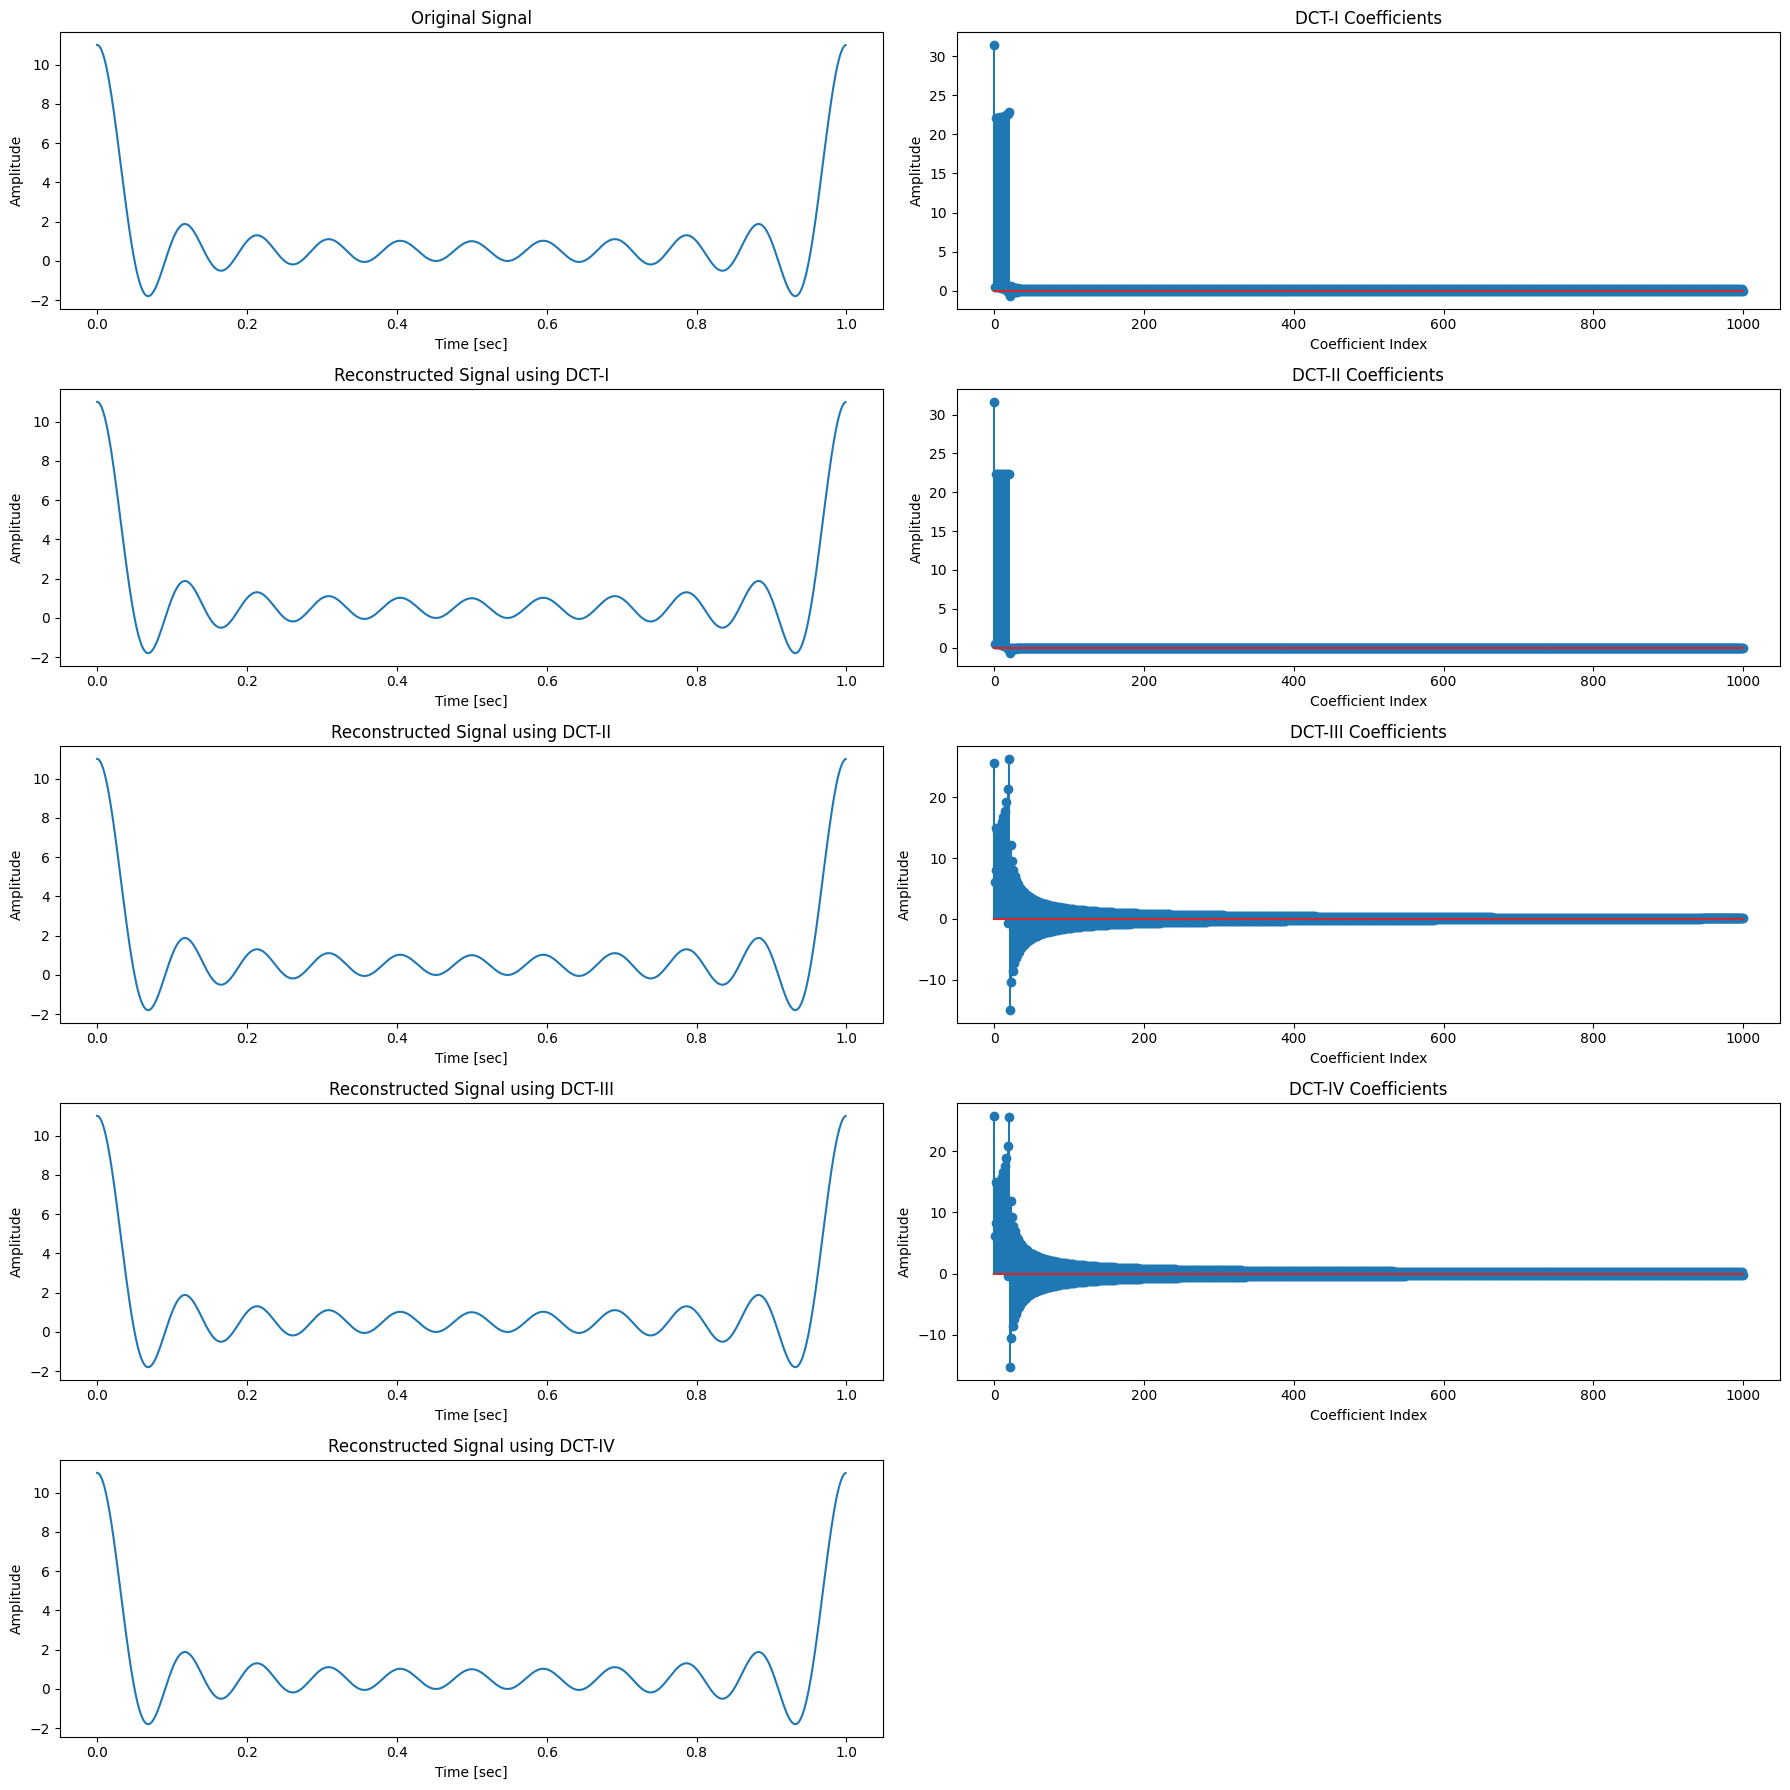

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# Generate a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
freq = np.linspace(0, 10, 11)  # Frequencies of the signal components
x = np.sum(np.cos(2 * np.pi * f * t) for f in freq)

# Parameters for DCT
N = len(x)

# Compute DCT-I
X_I = dct(x, type=1, norm='ortho')

# Compute DCT-II
X_II = dct(x, type=2, norm='ortho')

# Compute DCT-III
X_III = dct(x, type=3, norm='ortho')

# Compute DCT-IV
X_IV = dct(x, type=4, norm='ortho')

# Reconstruct the signal from DCT coefficients
x_rec_I = idct(X_I, type=1, norm='ortho')
x_rec_II = idct(X_II, type=2, norm='ortho')
x_rec_III = idct(X_III, type=3, norm='ortho')
x_rec_IV = idct(X_IV, type=4, norm='ortho')

# Plot the original and reconstructed signals along with DCT coefficients
plt.figure(figsize=(18, 18))

# Original Signal
plt.subplot(5, 2, 1)
plt.plot(t, x)
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]')

# Reconstructed Signal using DCT-I
plt.subplot(5, 2, 3)
plt.plot(t, x_rec_I)
plt.title('Reconstructed Signal using DCT-I')
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]')

# Reconstructed Signal using DCT-II
plt.subplot(5, 2, 5)
plt.plot(t, x_rec_II)
plt.title('Reconstructed Signal using DCT-II')
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]')

# Reconstructed Signal using DCT-III
plt.subplot(5, 2, 7)
plt.plot(t, x_rec_III)
plt.title('Reconstructed Signal using DCT-III')
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]')

# Reconstructed Signal using DCT-IV
plt.subplot(5, 2, 9)
plt.plot(t, x_rec_IV)
plt.title('Reconstructed Signal using DCT-IV')
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]')

# DCT-I Coefficients
plt.subplot(5, 2, 2)
plt.stem(range(N), X_I)
plt.title('DCT-I Coefficients')
plt.ylabel('Amplitude')
plt.xlabel('Coefficient Index')

# DCT-II Coefficients
plt.subplot(5, 2, 4)
plt.stem(range(N), X_II)
plt.title('DCT-II Coefficients')
plt.ylabel('Amplitude')
plt.xlabel('Coefficient Index')

# DCT-III Coefficients
plt.subplot(5, 2, 6)
plt.stem(range(N), X_III)
plt.title('DCT-III Coefficients')
plt.ylabel('Amplitude')
plt.xlabel('Coefficient Index')

# DCT-IV Coefficients
plt.subplot(5, 2, 8)
plt.stem(range(N), X_IV)
plt.title('DCT-IV Coefficients')
plt.ylabel('Amplitude')
plt.xlabel('Coefficient Index')

plt.tight_layout()
plt.show()


## Wavelet transform
- A function ${\displaystyle \psi \,\in \,L^{2}(\mathbb {R} )}$ is called an **orthonormal wavelet** if it can be used to define a Hilbert basis, that is a complete orthonormal system, for the Hilbert space ${\displaystyle L^{2}\left(\mathbb {R} \right)}$ of square integrable functions.
- The **Hilbert basis** is constructed as the family of functions
${\displaystyle \{\psi _{jk}:\,j,\,k\,\in \,\mathbb {Z} \}}$ by means of dyadic translations and dilations of
${\displaystyle \psi \,},$
$${\displaystyle \psi _{jk}(x)=2^{\frac {j}{2}}\psi \left(2^{j}x-k\right)\,}$$
- Integral wavelet transform is :
$$[W_ψf](a,b)=\frac{1}{\sqrt{|a|}}∫_{∞}^∞\overline{ψ\left(\frac{x-b}{a}f(x)dx \right)}=\sum_{j,k=∞}^∞[W_ψf](2^{-j},k2^{-j})ψ_{jk}$$
where $a=2^{-j}$ is called dyadiv dilatation and $b=k2^{-j}$ is called dyadic position.
- Example: Haar wavelet, or Db1 :
$$ψ(t)=\begin{cases}1 & 0 \leq t < 0.5 \\ -1 & 0.5 \leq t <1 \\ 0 & \text{ otherwise} \end{cases}$$
It's hilbert basis is : $$ψ_{jk}(t)=2^{j/2}ψ(2^jt-k)=\begin{cases}2^{j/2} & k2^{-j} \leq t <(k+ 0.5)2^{-j} \\ -2^{j/2} & (k+0.5)2^{-j} \leq t <(k+1)2^{-j} \\ 0 & \text{ otherwise} \end{cases}$$
- Level of transformation
Let $x(n)$ be the input signal. The low pass filter $g(n)$ and highpass filter $g(n)$ is applied to $x(n)$.
-- 1st level
The approximation coefficients: $a_1(n)$ and the detail coefficients: $d_1(n)$.
$$\begin{cases}a_1(n)=\sum_k h(k)x(2n-k) \\ d_1(n)=\sum_k g(k)x(2n-k) \end{cases}$$
-- Nth level :
The approximation coefficients: $a_N(n)$ and the detail coefficients is $d_N(n)$.
$$\begin{cases}a_N(n)=\sum_k h(k)a_{N-1}(2n-k) \\ d_N(n)=\sum_k g(k)a_{N-1}(2n-k) \end{cases}$$
We can visualize it :
<img src="https://github.com/arofenitra/Scientific-Computing/blob/main/image_processing/Wavelets_Filter_Bank.png?raw=1">



In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.4 MB/s eta 0:00:00


<ipython-input-20-610988b1e02b>:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  x = np.sum(np.cos(2 * np.pi * f * t) for f in freq)


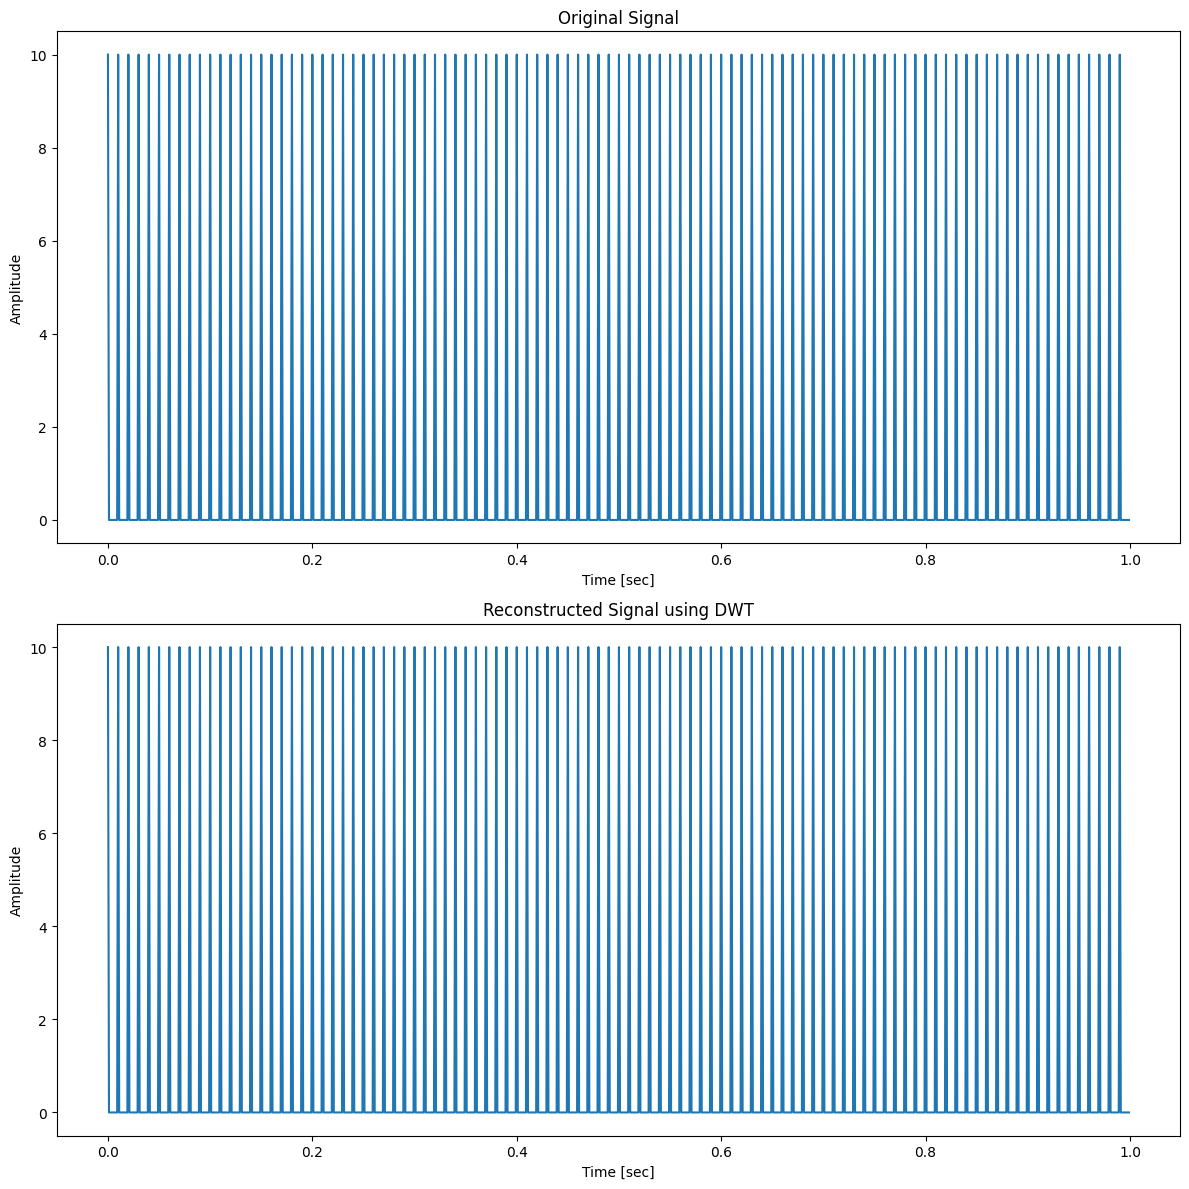

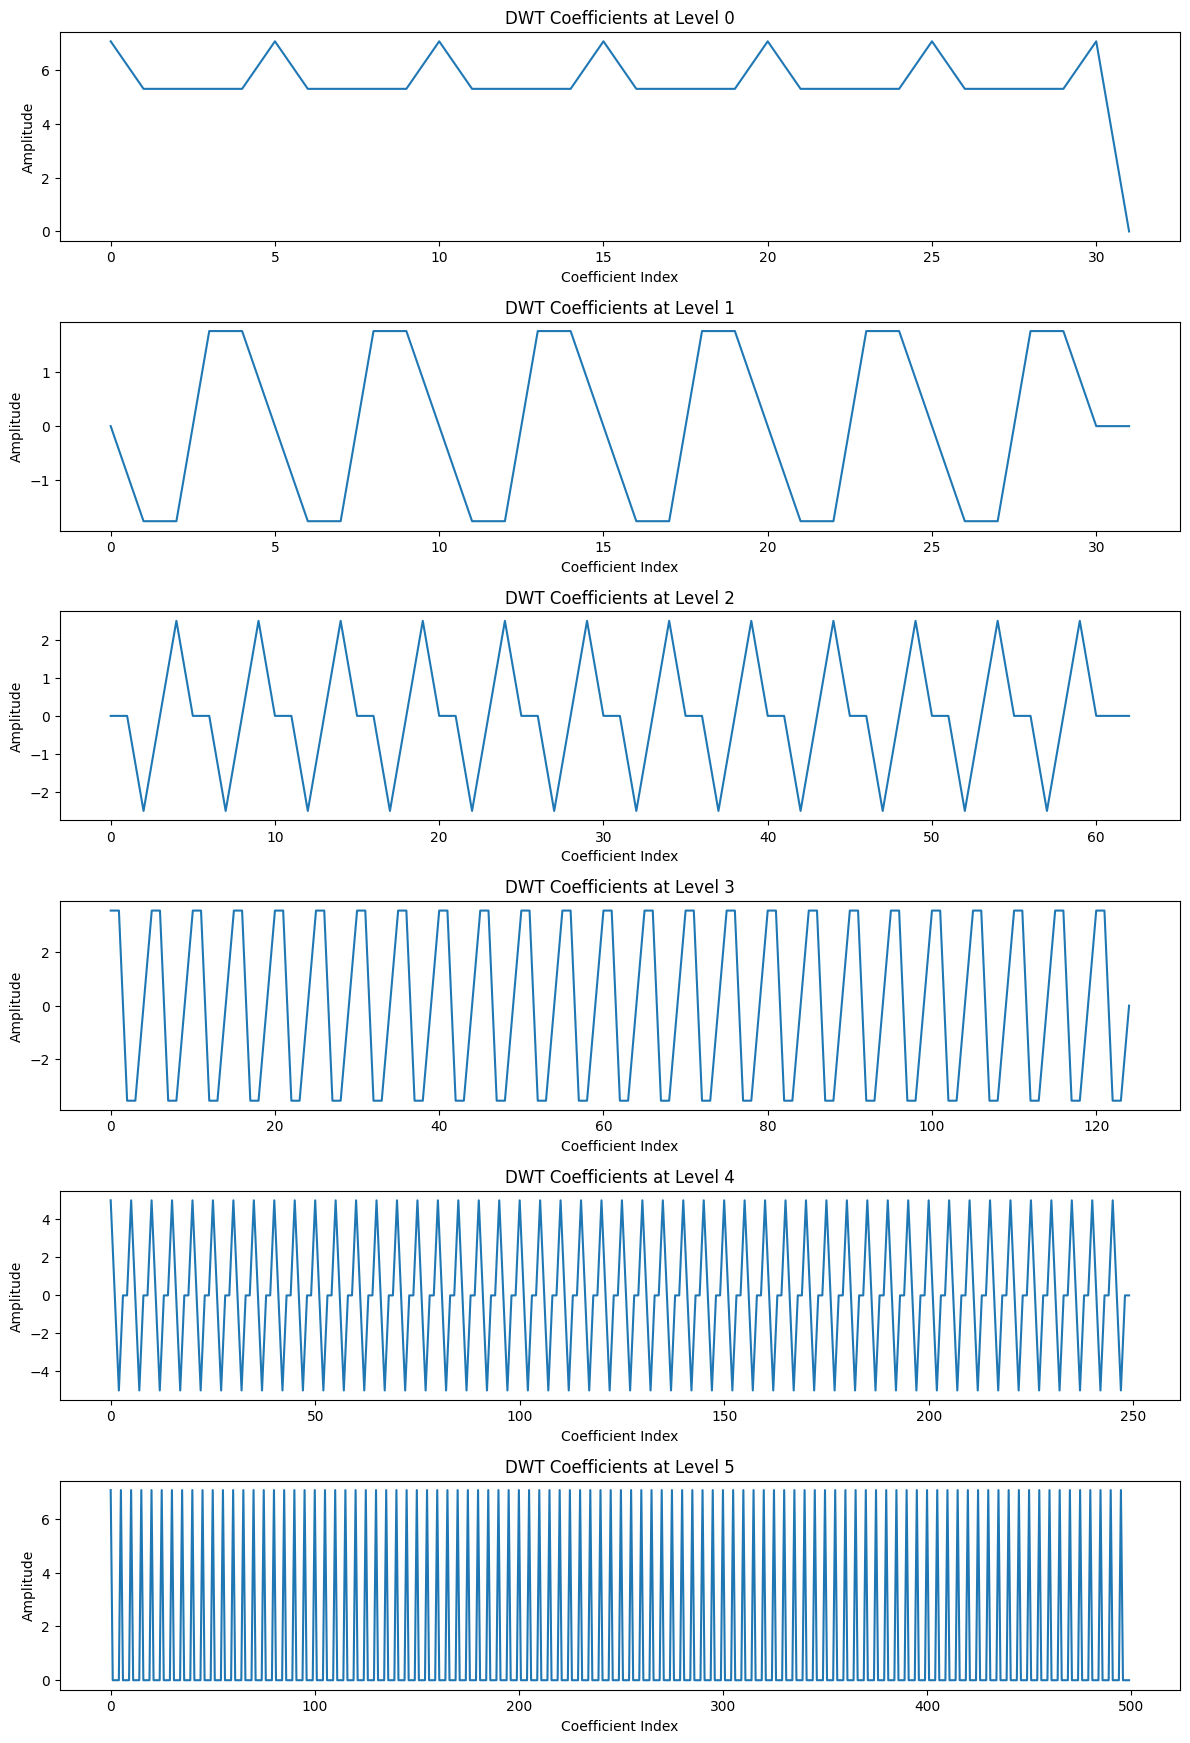

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
freq = np.linspace(100, 1000, 10)  # Frequencies of the signal components
x = np.sum(np.cos(2 * np.pi * f * t) for f in freq)

# Parameters for DWT
wavelet = 'db1'  # Daubechies wavelet with 1 vanishing moment
level = 5  # Number of decomposition levels

# Compute DWT
coeffs = pywt.wavedec(x, wavelet, level=level)

# Reconstruct the signal from DWT coefficients
x_rec = pywt.waverec(coeffs, wavelet)

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]')

plt.subplot(2, 1, 2)
plt.plot(t, x_rec)
plt.title('Reconstructed Signal using DWT')
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]')

plt.tight_layout()
plt.show()
'''
At each level, the signal is passed through a low-pass filter (to get the
 approximation coefficients) and a high-pass filter (to get the detail coefficients).
The output of the low-pass filter is then downsampled by a factor of 2 and
used as the input for the next level of decomposition.
'''
# Plot the DWT coefficients
plt.figure(figsize=(12, 20))
for i, coeff in enumerate(coeffs):
    plt.subplot(level + 2, 1, i + 1)
    plt.plot(coeff)
    plt.title(f'DWT Coefficients at Level {i}')
    plt.ylabel('Amplitude')
    plt.xlabel('Coefficient Index')

plt.tight_layout()
plt.show()
